min max
[-7.129796e-04  2.159737e-06] [1.0021842 1.0000367]
1.90M Parameters


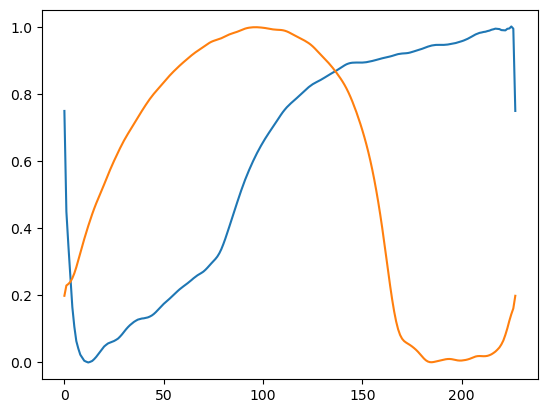

In [1]:
PATH = "/media/maxine/c8f4bcb2-c1fe-4676-877d-8e476418f5e5/0-RPE-cell-timelapse/"
from modules.learning.models import *
from modules.learning.train import train_model
from modules.utils import hc
from modules.visualize import plot_loss, plot_normalized_time_error

# from modules.learning.evaluate import Evaluation, get_latent_space, plot_umap
from matplotlib import pyplot as plt
from modules.learning.dycep import DYCEP
import json

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# enet = EfficientNet()
model = DYCEP()
model.to(DEVICE)

track_path = PATH + "track_datasets/control_mm/train/images/"
label_path = PATH + "track_datasets/control_mm/train/labels/"

#########
# test on one track
#########

track_name = "0607.1629.npy"
# getting one sequence to check the model
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, [2], :, :]


label = torch.tensor(
    np.load(label_path + track_name).reshape(2, -1).T,
    dtype=torch.float32,
)

imgs, label = imgs.to(DEVICE), label.to(DEVICE)

zz = model.forward(imgs[None, :, :, :])
zz= zz.detach().cpu().numpy().squeeze()
plt.plot(zz)
print("min max")
print(zz.min(0), zz.max(0))
print(hc(model), "Parameters")



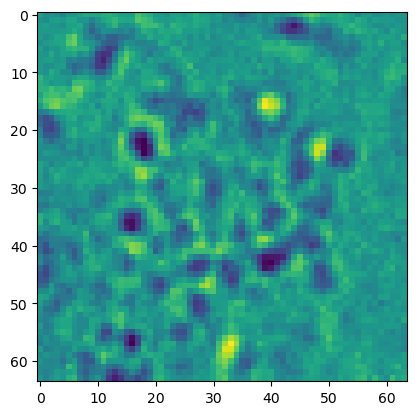

In [2]:
imgs.shape
imgs = torch.tensor(
    np.load(track_path + track_name, allow_pickle=True),
    dtype=torch.float32,
)[:, :, :, :]

plt.imshow(imgs[10, 1, :, :].detach().cpu().numpy())

In [3]:
train_model(
    directory=PATH + "track_datasets/control_mm/",
    model=model,
    # pass [1] for only BF channel, or [1,1,1] for 3 times the same channel
    # or [0,1,2] for all channels
    img_channels=[1],
    batch_size=1,
    learning_rate=1e-4,
    slice_p=0,
    name="DYCEP",
    num_epochs=20,
)

Epoch 1/20


100%|██████████| 358/358 [00:04<00:00, 75.09it/s]


    Train Loss: 0.015, Test Loss: 0.019
    Train R2: 0.890, Test R2: 0.891
Epoch 2/20


100%|██████████| 358/358 [00:04<00:00, 82.65it/s]


    Train Loss: 0.013, Test Loss: 0.017
    Train R2: 0.895, Test R2: 0.896
Epoch 3/20


100%|██████████| 358/358 [00:04<00:00, 83.15it/s]


    Train Loss: 0.012, Test Loss: 0.017
    Train R2: 0.899, Test R2: 0.901
Epoch 4/20


100%|██████████| 358/358 [00:04<00:00, 82.65it/s]


    Train Loss: 0.010, Test Loss: 0.018
    Train R2: 0.903, Test R2: 0.905
Epoch 5/20


100%|██████████| 358/358 [00:04<00:00, 82.76it/s]


    Train Loss: 0.009, Test Loss: 0.017
    Train R2: 0.907, Test R2: 0.909
Epoch 6/20


100%|██████████| 358/358 [00:04<00:00, 82.83it/s]


    Train Loss: 0.008, Test Loss: 0.018
    Train R2: 0.912, Test R2: 0.913
Epoch 7/20


100%|██████████| 358/358 [00:04<00:00, 82.39it/s]


    Train Loss: 0.008, Test Loss: 0.018
    Train R2: 0.915, Test R2: 0.917
Epoch 8/20


100%|██████████| 358/358 [00:04<00:00, 82.68it/s]


    Train Loss: 0.007, Test Loss: 0.018
    Train R2: 0.918, Test R2: 0.919
Epoch 9/20


100%|██████████| 358/358 [00:04<00:00, 83.11it/s]


    Train Loss: 0.007, Test Loss: 0.018
    Train R2: 0.921, Test R2: 0.922
Epoch 10/20


100%|██████████| 358/358 [00:04<00:00, 82.75it/s]


    Train Loss: 0.007, Test Loss: 0.018
    Train R2: 0.923, Test R2: 0.924
Epoch 11/20


100%|██████████| 358/358 [00:04<00:00, 82.56it/s]


    Train Loss: 0.007, Test Loss: 0.018
    Train R2: 0.925, Test R2: 0.926
Epoch 12/20


100%|██████████| 358/358 [00:04<00:00, 82.44it/s]


    Train Loss: 0.007, Test Loss: 0.018
    Train R2: 0.926, Test R2: 0.927
Epoch 13/20


100%|██████████| 358/358 [00:04<00:00, 82.73it/s]


    Train Loss: 0.006, Test Loss: 0.017
    Train R2: 0.928, Test R2: 0.928
Epoch 14/20


100%|██████████| 358/358 [00:04<00:00, 82.48it/s]


    Train Loss: 0.006, Test Loss: 0.017
    Train R2: 0.929, Test R2: 0.930
Epoch 15/20


100%|██████████| 358/358 [00:04<00:00, 82.65it/s]


    Train Loss: 0.006, Test Loss: 0.018
    Train R2: 0.930, Test R2: 0.931
Epoch 16/20


100%|██████████| 358/358 [00:04<00:00, 82.54it/s]


    Train Loss: 0.006, Test Loss: 0.018
    Train R2: 0.931, Test R2: 0.932
Epoch 17/20


100%|██████████| 358/358 [00:04<00:00, 82.72it/s]


    Train Loss: 0.006, Test Loss: 0.018
    Train R2: 0.932, Test R2: 0.933
Epoch 18/20


100%|██████████| 358/358 [00:04<00:00, 82.90it/s]


    Train Loss: 0.006, Test Loss: 0.017
    Train R2: 0.933, Test R2: 0.934
Epoch 19/20


100%|██████████| 358/358 [00:04<00:00, 83.05it/s]


    Train Loss: 0.006, Test Loss: 0.017
    Train R2: 0.934, Test R2: 0.934
Epoch 20/20


100%|██████████| 358/358 [00:04<00:00, 82.88it/s]

    Train Loss: 0.006, Test Loss: 0.018
    Train R2: 0.935, Test R2: 0.935


'Done!'

# Go to result_dycep notebook